In [263]:
import pandas as pd
import glob
import csv
import numpy as np
from samay import samay
import mpld3
from sklearn import metrics

mpld3.enable_notebook()

class kalman_filter:
	def __init__(self):
		self.varProcess=1E-9
		self.Variance=0.0
		self.Pc=0.0
		self.P=1.0
		self.Gain=0.0
		self.Xp=0.0
		self.Zp=0.0
		self.Xe=0.0
		self.sum=0.0
		self.mean1=0.0
		self.mean2=0.0
		self.product=0.0
		self.counter=1
		self.maxCount = 150
		self.mode = {'var_mode' : 0, 'filter_mode' : 1}
		if self.counter >= self.maxCount:
			self.current_mode = self.mode['filter_mode']
		else:
			self.current_mode = self.mode['var_mode']

	def filter(self,data):
		self.Pc=self.P+self.varProcess
		self.Gain=(self.Pc/(self.Pc+self.Variance))
		self.P=(1-self.Gain)*self.Pc
		self.Xp=self.Xe
		self.Zp=self.Xp
		self.Xe=self.Gain*(data-self.Zp)+self.Xp
		return self.Xe

	def variance(self,data):
		self.sum= (self.sum)+data
		self.mean1=(self.sum)/(self.counter)
		self.product=(self.product)+(data*data)
		self.mean2=(self.product)/(self.counter)
		self.Variance=self.mean2-(self.mean1*self.mean1)
		self.counter=self.counter+1
		if self.counter + 1 >= self.maxCount:
			return True
		else:
			return False

	def filterWorker(self,data):
		if self.current_mode == self.mode['var_mode']:
			if self.variance(data):
				self.current_mode = self.mode['filter_mode']
			else:
				return False

		if self.current_mode == self.mode['filter_mode']:
			return "%.2f" % round(self.filter(data),2)

	def setVariance(self,data):
		self.current_mode = self.mode['filter_mode']
		self.Variance = data

	def isVarianceReady(self):
		if self.current_mode == self.mode['var_mode']:
			return False
		else:
			return True

	def getVariance(self):
		return self.Variance

	def returnGain(self):
		return self.Gain

	def iniitalisevalues(self,data):
		self.x[self.q]=data
		self.q=self.q+1

	def allanvariance(self):
		self.acc=0.0
		for k in range(1,5):
			self.m=200
			for s in range(0,m):
				acc=0.0
				for l in range(s*k,s*k+k):
					acc+=x[l]
				a[s]=acc/k
			acc=0
			m=m-1
			for s in range(0,m):
				self.temp=a[s+1]-a[s]
				acc=acc+(temp*temp)
			b[k-1]= acc/(2*m)

In [87]:
def get_id(row):
    return str(row['ts']).replace(" ","_")+"_"+row['user']
data['id'] = data.apply(get_id, axis=1)

In [8]:
from pymongo import MongoClient 
  
try: 
    conn = MongoClient() 
    print("Connected successfully!!!") 
except:   
    print("Could not connect to MongoDB") 
  
# database 
db = conn.database 
  
# Created or Switched to collection names: my_gfg_collection 
collection = db.nagesh 

Connected successfully!!!


/home/utkarshmalik/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: FutureWarning: pd.TimeGrouper is deprecated and will be removed; Please use pd.Grouper(freq=...)
  


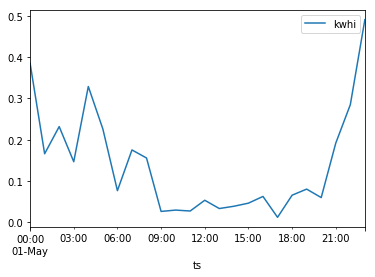

In [167]:
start_date = pd.to_datetime(f'5/01/2019 00:00')
end_date = pd.to_datetime(f'5/01/2019 23:59')
data1=data.loc[(data['ts'] > start_date) & (data['ts'] < end_date)]
data1 = data1.set_index('ts')
data1 = data1[data1['user']=="Sheet4"]


data1 = data1.groupby(pd.TimeGrouper(freq='60Min', base=0, label='left')).mean()
# data1['skwhi'] = data1['kwhi'].shift(1, axis=0)
# data1['diff'] = data1['kwhi'] - data1['skwhi']
data1.plot(y='kwhi',use_index=True)
# odata = data.set_index('ts')
# for i in odata['user'].unique():
#     temp = odata[odata['user'] == i].groupby(pd.TimeGrouper(freq='60Min', base=0, label='left')).mean()
#     data2 = data1['kwhi'] - temp['kwhi']
#     data2.dropna().plot()
    

In [168]:
csvs = glob.iglob('data/**.csv')
dfs = []
for i in csvs:
    print(i)
#     print(i.split('-')[1].split('.')[0])
    df = pd.read_csv(i, engine="python")
    cont_kw = df.at[1,'Unnamed: 13']
    df = pd.read_csv(i, engine="python", skiprows = 4)
    df.columns = ['sno', 'ts', 'nan1','nan2','nan3','nan4','kwhi','kwhe','kvahi','kvahe','V','A','NA', 'byte']
    df.drop(['sno','nan1', 'nan2', 'nan3', 'nan4'], axis=1, inplace=True)
    df['cont_kw'] = cont_kw
    df['user']=i.split('-')[1].split('.')[0]
    df['ts'] = pd.to_datetime(df['ts'])
    dfs.append(df)

data = pd.concat(dfs)
data['pf'] = data['kwhi']/data['kvahi']


data/LPdata -Sheet5.csv
data/LPdata-Sheet7.csv
data/LPdata-Sheet2.csv
data/LPdata-Sheet9.csv
data/LPdata-Sheet3.csv
data/LPdata-Sheet10.csv
data/LPdata-Sheet6.csv
data/LPdata-Sheet8.csv
data/LPdata-Sheet4.csv
data/LPdata-Sheet1.csv


In [185]:
data

ts   kwhi  kwhe  kvahi  kvahe       V     A   NA byte  \
0   2019-05-01 00:00:00  0.049   0.0  0.060    0.0  226.24  1.05  0.0    -   
1   2019-05-01 00:15:00  0.050   0.0  0.060    0.0  227.60  1.05  0.0    -   
2   2019-05-01 00:30:00  0.044   0.0  0.055    0.0  227.45  0.96  0.0    -   
3   2019-05-01 00:45:00  0.040   0.0  0.051    0.0  228.44  0.89  0.0    -   
4   2019-05-01 01:00:00  0.041   0.0  0.052    0.0  229.02  0.90  0.0    -   
5   2019-05-01 01:15:00  0.041   0.0  0.052    0.0  229.84  0.90  0.0    -   
6   2019-05-01 01:30:00  0.041   0.0  0.052    0.0  230.09  0.90  0.0    -   
7   2019-05-01 01:45:00  0.042   0.0  0.053    0.0  231.63  0.91  0.0    -   
8   2019-05-01 02:00:00  0.043   0.0  0.055    0.0  231.33  0.93  0.0    -   
9   2019-05-01 02:15:00  0.042   0.0  0.053    0.0  233.38  0.92  0.0    -   
10  2019-05-01 02:30:00  0.042   0.0  0.054    0.0  232.54  0.91  0.0    -   
11  2019-05-01 02:45:00  0.041   0.0  0.053    0.0  233.92  0.91  0.0    -   
12  2019-05-01 03:00:00  0.043   0.0  0.055    0.0  234.08  0.92  0.0    -   
13  2019-05-01 03:15:00  0.042   0.0  0.055    0.0  237.85  0.93  0.0    -   
14  2019-05-01 03:30:00  0.043   0.0  0.057    0.0  238.91  0.94  0.0    -   
15  2019-05-01 03:45:00  0.043   0.0  0.057    0.0  239.32  0.94  0.0    -   
16  2019-05-01 04:00:00  0.044   0.0  0.057    0.0  239.43  0.94  0.0    -   
17  2019-05-01 04:15:00  0.043   0.0  0.057    0.0  239.79  0.95  0.0    -   
18  2019-05-01 04:30:00  0.044   0.0  0.057    0.0  240.24  0.95  0.0    -   
19  2019-05-01 04:45:00  0.043   0.0  0.058    0.0  240.42  0.95  0.0    -   
20  2019-05-01 05:00:00  0.043   0.0  0.057    0.0  240.79  0.95  0.0    -   
21  2019-05-01 05:15:00  0.043   0.0  0.058    0.0  240.78  0.95  0.0    -   
22  2019-05-01 05:30:00  0.044   0.0  0.057    0.0  241.05  0.95  0.0    -   
23  2019-05-01 05:45:00  0.044   0.0  0.059    0.0  241.40  0.95  0.0    -   
24  2019-05-01 06:00:00  0.043   0.0  0.057    0.0  241.32  0.95  0.0    -   
25  2019-05-01 06:15:00  0.043   0.0  0.058    0.0  240.20  0.95  0.0    -   
26  2019-05-01 06:30:00  0.043   0.0  0.056    0.0  239.59  0.94  0.0    -   
27  2019-05-01 06:45:00  0.014   0.0  0.018    0.0  237.56  0.93  0.0    -   
28  2019-05-01 07:00:00  0.012   0.0  0.016    0.0  232.03  0.92  0.0    -   
29  2019-05-01 07:15:00  0.043   0.0  0.055    0.0  235.28  0.93  0.0    -   
..                  ...    ...   ...    ...    ...     ...   ...  ...  ...   
930 2019-05-10 16:30:00  0.074   0.0  0.241    0.0  241.01  3.98  0.0    -   
931 2019-05-10 16:45:00  0.078   0.0  0.193    0.0  241.17  3.19  0.0    -   
932 2019-05-10 17:00:00  0.088   0.0  0.242    0.0  241.88  4.00  0.0    -   
933 2019-05-10 17:15:00  0.094   0.0  0.252    0.0  242.56  4.14  0.0    -   
934 2019-05-10 17:30:00  0.094   0.0  0.149    0.0  243.94  2.44  0.0    -   
935 2019-05-10 17:45:00  0.127   0.0  0.131    0.0  246.50  2.11  0.0    -   
936 2019-05-10 18:00:00  0.125   0.0  0.127    0.0  248.32  2.04  0.0    -   
937 2019-05-10 18:15:00  0.105   0.0  0.109    0.0  251.27  1.73  0.0    -   
938 2019-05-10 18:30:00  0.173   0.0  0.179    0.0  251.01  2.85  0.0    -   
939 2019-05-10 18:45:00  0.182   0.0  0.188    0.0  251.20  2.99  0.0    -   
940 2019-05-10 19:00:00  0.212   0.0  0.220    0.0  252.15  3.47  0.0    -   
941 2019-05-10 19:15:00  0.198   0.0  0.206    0.0  252.46  3.26  0.0    -   
942 2019-05-10 19:30:00  0.177   0.0  0.185    0.0  252.66  2.92  0.0    -   
943 2019-05-10 19:45:00  0.130   0.0  0.138    0.0  252.85  2.17  0.0    -   
944 2019-05-10 20:00:00  0.135   0.0  0.141    0.0  253.04  2.24  0.0    -   
945 2019-05-10 20:15:00  0.134   0.0  0.142    0.0  252.82  2.23  0.0    -   
946 2019-05-10 20:30:00  0.134   0.0  0.141    0.0  252.92  2.22  0.0    -   
947 2019-05-10 20:45:00  0.136   0.0  0.142    0.0  251.61  2.26  0.0    -   
948 2019-05-10 21:00:00  0.103   0.0  0.110    0.0  252.11  1.73  0.0    -   
949 2019-05-10 21:15:00  0.139   0.0  0.145

## Sumation of load per hour

/home/utkarshmalik/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: FutureWarning: pd.TimeGrouper is deprecated and will be removed; Please use pd.Grouper(freq=...)
  """


1.9809999999999999

2.07

1.6277499999999998

1.27325

2.27725

2.0595

1.8235000000000001

2.3742500000000004

3.15725

2.9515000000000002

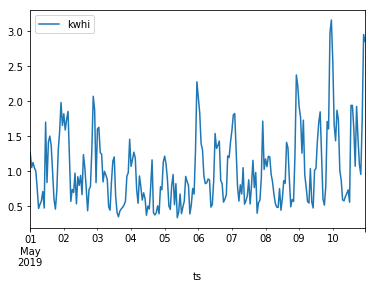

In [202]:
hourly = []
data1 = data.set_index('ts')
for i in data['user'].unique():
    data2 = data1[data1['user']==i]
    data2 = data2.groupby(pd.TimeGrouper(freq='60Min', base=0, label='left')).mean()
    data2 = data2.reset_index()
    hourly.append(data2)
    
hourly = pd.concat(hourly)
# display(hourly)
hourly = hourly.groupby('ts').sum().reset_index()
# display(hourly)
hourly.plot(y='kwhi',x='ts')

for j in range(1, 11):
    day = j
    start_date = pd.to_datetime(f'5/{day}/2019 00:00')
    end_date = pd.to_datetime(f'5/{day}/2019 23:59')

    daily=hourly.loc[(hourly['ts'] >= start_date) & (hourly['ts'] <= end_date)]
    display(daily['kwhi'].max())

## S = Hourly Average - 1 House KW

/home/utkarshmalik/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: FutureWarning: pd.TimeGrouper is deprecated and will be removed; Please use pd.Grouper(freq=...)
  """
/home/utkarshmalik/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: FutureWarning: pd.TimeGrouper is deprecated and will be removed; Please use pd.Grouper(freq=...)
  


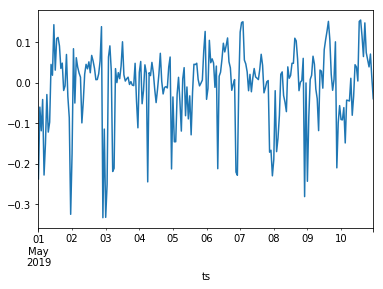

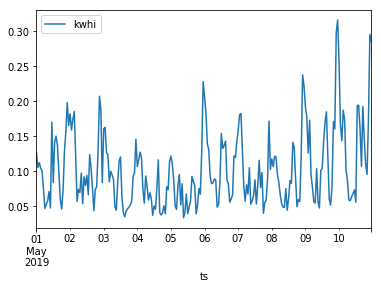

In [212]:
hourly = []
data1 = data.set_index('ts')
for i in data['user'].unique():
    data2 = data1[data1['user']==i]
    data2 = data2.groupby(pd.TimeGrouper(freq='60Min', base=0, label='left')).mean()
    data2 = data2.reset_index()
    hourly.append(data2)
    
hourly = pd.concat(hourly)
# display(hourly)
hourlyMean = hourly.groupby('ts').mean()

data2 = data1[data1['user']=="Sheet4"]
data2 = data2.groupby(pd.TimeGrouper(freq='60Min', base=0, label='left')).mean()
diff = hourlyMean['kwhi'] - data2['kwhi']
diff.plot(y="kwhi", use_index=True)
hourlyMean.plot(y="kwhi", use_index=True)
# display(hourly)
# hourly.plot(y='kwhi',x='ts')

In [261]:
def fit_kalman(series):
    kf = kalman_filter()
    for i in series.values.tolist():
        kf.variance(i)

    print(kf.getVariance())
    
    kwhi = series.values.tolist()
    print("applying kf on "+ str(len(kwhi))+ " data points")
    pred = []
    test = []
    for i in range(len(kwhi)-1):
        pred.append(kf.filter(kwhi[i]))
        test.append(kwhi[i+1])

    print(metrics.mean_absolute_error(test, pred))

## Kalman Filter on total load

0.2824640895822481
applying kf on 240 data points
0.4061840310336269


/home/utkarshmalik/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: FutureWarning: pd.TimeGrouper is deprecated and will be removed; Please use pd.Grouper(freq=...)
  """


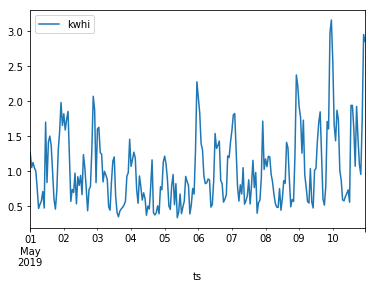

In [265]:
hourly = []
data1 = data.set_index('ts')
for i in data['user'].unique():
    data2 = data1[data1['user']==i]
    data2 = data2.groupby(pd.TimeGrouper(freq='60Min', base=0, label='left')).mean()
    data2 = data2.reset_index()
    hourly.append(data2)
    
hourly = pd.concat(hourly)
hourly = hourly.groupby('ts').sum().reset_index()
fit_kalman(hourly['kwhi'])
hourly.plot(y='kwhi',x='ts')